# Exploratory Data Analysis (EDA) - XDF Data

This notebook explores the data from `sub-P005_ses-S002_task-Default_run-001_eeg_up.xdf`

## 1. Import Required Libraries

In [2]:
import pyxdf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load XDF Data

In [3]:
# Define path to the XDF file
data_path = Path("../data/sub-P005_ses-S002_task-Default_run-001_eeg_up.xdf")

# Load the XDF file
print(f"Loading XDF file: {data_path}")
streams, header = pyxdf.load_xdf(str(data_path))

print(f"\n✓ File loaded successfully!")
print(f"Number of streams: {len(streams)}")

Loading XDF file: ../data/sub-P005_ses-S002_task-Default_run-001_eeg_up.xdf

✓ File loaded successfully!
Number of streams: 2

✓ File loaded successfully!
Number of streams: 2


In [18]:
streams

[{'info': defaultdict(list,
              {'name': ['stimulus_stream'],
               'type': ['Markers'],
               'channel_count': ['1'],
               'channel_format': ['int32'],
               'source_id': ['stimulus_stream_001'],
               'nominal_srate': ['0.000000000000000'],
               'version': ['1.100000000000000'],
               'created_at': ['10014.17207990000'],
               'uid': ['72e7b7f1-2010-4c69-8037-e77479367c40'],
               'session_id': ['default'],
               'hostname': ['L-1027100110'],
               'v4address': [None],
               'v4data_port': ['16572'],
               'v4service_port': ['16572'],
               'v6address': [None],
               'v6data_port': ['16572'],
               'v6service_port': ['16572'],
               'desc': [defaultdict(list,
                            {'experiment': [defaultdict(list,
                                          {'task': ['Upper-limb both arms'],
                          

## 3. Overview of All Streams

XDF files can contain multiple data streams (e.g., EEG, markers, auxiliary data). Let's explore what streams are available.

In [20]:
streams[1]

{'info': defaultdict(list,
             {'name': ['eegoSports 000650'],
              'type': ['EEG'],
              'channel_count': ['71'],
              'nominal_srate': ['1000'],
              'channel_format': ['double64'],
              'source_id': ['eegoSports_000650'],
              'version': ['1.1000000000000001'],
              'created_at': ['7255.1273566999998'],
              'uid': ['055d0277-59f2-42de-8f97-174699be8396'],
              'session_id': ['default'],
              'hostname': ['L-1010036864'],
              'v4address': [None],
              'v4data_port': ['16572'],
              'v4service_port': ['16578'],
              'v6address': [None],
              'v6data_port': ['16572'],
              'v6service_port': ['16578'],
              'desc': [defaultdict(list,
                           {'channels': [defaultdict(list,
                                         {'channel': [defaultdict(list,
                                                       {'label':

In [ ]:
# Explore each stream
for i, stream in enumerate(streams):
    print(f"\n{'='*70}")
    print(f"STREAM {i+1}")
    print(f"{'='*70}")
    
    # Basic info
    info = stream['info']
    print(f"Stream Name: {info['name'][0]}")
    print(f"Stream Type: {info['type'][0]}")
    print(f"Channel Count: {info['channel_count'][0]}")
    print(f"Sampling Rate: {info['nominal_srate'][0]} Hz")
    
    # Data shape
    if 'time_series' in stream:
        data = stream['time_series']
        timestamps = stream['time_stamps']
        print(f"\nData Shape: {data.shape}")
        print(f"  - Samples: {data.shape[0]}")
        print(f"  - Channels: {data.shape[1] if len(data.shape) > 1 else 1}")
        print(f"Duration: {timestamps[-1] - timestamps[0]:.2f} seconds")
    
    # Channel labels if available

    desc = info['desc'][0]
    channels = desc['channels'][0]
    ch_list = channels['channel']
    print(f"\nChannel Labels:")
    if isinstance(ch_list, list):
        for idx, ch in enumerate(ch_list): 
            if 'label' in ch:
                print(f"  {idx+1}. {ch['label'][0]}")
            


STREAM 1
Stream Name: stimulus_stream
Stream Type: Markers
Channel Count: 1
Sampling Rate: 0.000000000000000 Hz

Data Shape: (364, 1)
  - Samples: 364
  - Channels: 1
Duration: 1765.50 seconds

STREAM 2
Stream Name: eegoSports 000650
Stream Type: EEG
Channel Count: 71
Sampling Rate: 1000 Hz

Data Shape: (1794018, 71)
  - Samples: 1794018
  - Channels: 71
Duration: 1794.01 seconds

Channel Labels:
  1. FP1
  2. FPZ
  3. FP2
  4. F7
  5. F3
  6. FZ
  7. F4
  8. F8
  9. FC5
  10. FC1
  11. FC2
  12. FC6
  13. M1
  14. T7
  15. C3
  16. CZ
  17. C4
  18. T8
  19. M2
  20. CP5
  21. CP1
  22. CP2
  23. CP6
  24. P7
  25. P3
  26. PZ
  27. P4
  28. P8
  29. POZ
  30. O1
  31. O2
  32. EOG
  33. AF7
  34. AF3
  35. AF4
  36. AF8
  37. F5
  38. F1
  39. F2
  40. F6
  41. FC3
  42. FCZ
  43. FC4
  44. C5
  45. C1
  46. C2
  47. C6
  48. CP3
  49. CP4
  50. P5
  51. P1
  52. P2
  53. P6
  54. PO5
  55. PO3
  56. PO4
  57. PO6
  58. FT7
  59. FT8
  60. TP7
  61. TP8
  62. PO7
  63. PO8
  64. OZ


## 4. Detailed Analysis of Main EEG Stream

Let's focus on the main EEG data stream for deeper analysis.

In [6]:
# Find the main EEG stream (usually the one with most channels or type 'EEG')
eeg_stream = None
for stream in streams:
    stream_type = stream['info']['type'][0].upper()
    if 'EEG' in stream_type or int(stream['info']['channel_count'][0]) > 1:
        eeg_stream = stream
        break

if eeg_stream is None:
    eeg_stream = streams[0]  # Default to first stream

# Extract data
eeg_data = eeg_stream['time_series']
eeg_timestamps = eeg_stream['time_stamps']
sampling_rate = float(eeg_stream['info']['nominal_srate'][0])

print(f"Selected Stream: {eeg_stream['info']['name'][0]}")
print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Data Shape: {eeg_data.shape}")
print(f"Duration: {eeg_timestamps[-1] - eeg_timestamps[0]:.2f} seconds")
print(f"\nData Type: {eeg_data.dtype}")
print(f"Memory Usage: {eeg_data.nbytes / 1024 / 1024:.2f} MB")

Selected Stream: eegoSports 000650
Sampling Rate: 1000.0 Hz
Data Shape: (1794018, 71)
Duration: 1794.01 seconds

Data Type: float64
Memory Usage: 971.80 MB


### 4.1 Statistical Summary of EEG Data

In [7]:
# Get channel labels
channel_labels = []
info = eeg_stream['info']
if 'desc' in info and info['desc']:
    desc = info['desc'][0]
    if 'channels' in desc and desc['channels']:
        channels = desc['channels'][0]
        if 'channel' in channels:
            ch_list = channels['channel']
            if isinstance(ch_list, list):
                for ch in ch_list:
                    if 'label' in ch:
                        channel_labels.append(ch['label'][0])

# If no labels found, create generic ones
if not channel_labels:
    channel_labels = [f"Ch_{i+1}" for i in range(eeg_data.shape[1])]

# Create DataFrame for easier analysis
df = pd.DataFrame(eeg_data, columns=channel_labels)
df['timestamp'] = eeg_timestamps

print("Statistical Summary of EEG Channels:")
print(df.describe())

Statistical Summary of EEG Channels:
                FP1           FPZ           FP2            F7            F3  \
count  1.794018e+06  1.794018e+06  1.794018e+06  1.794018e+06  1.794018e+06   
mean  -6.524944e+03 -4.123347e+03 -7.114065e+03 -1.077765e+03 -9.765904e+02   
std    3.868387e+02  6.558019e+02  2.268442e+02  3.492461e+02  1.800892e+02   
min   -7.196770e+03 -5.487270e+03 -7.707960e+03 -1.747470e+03 -1.460960e+03   
25%   -6.833910e+03 -4.489997e+03 -7.307380e+03 -1.315190e+03 -1.092260e+03   
50%   -6.680625e+03 -4.253250e+03 -7.087600e+03 -1.216590e+03 -1.047520e+03   
75%   -6.270010e+03 -3.697870e+03 -6.991940e+03 -8.038200e+02 -9.597100e+02   
max   -5.481290e+03 -2.629570e+03 -6.451720e+03 -1.608600e+02 -2.904100e+02   

                 FZ            F4            F8           FC5           FC1  \
count  1.794018e+06  1.794018e+06  1.794018e+06  1.794018e+06  1.794018e+06   
mean   5.933228e+03 -1.991485e+03  6.742466e+01  4.936510e+02  3.515354e+03   
std    2.56108

### 4.2 Data Quality Checks

In [8]:
# Check for missing values
print("Missing Values Check:")
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
    print("✓ No missing values found")
else:
    print(f"⚠ Found missing values:\n{missing_data[missing_data > 0]}")

print("\n" + "="*70)

# Check for infinite values
print("\nInfinite Values Check:")
inf_data = np.isinf(eeg_data).sum(axis=0)
if inf_data.sum() == 0:
    print("✓ No infinite values found")
else:
    print(f"⚠ Found infinite values in {np.sum(inf_data > 0)} channels")

print("\n" + "="*70)

# Check sampling rate consistency
print("\nSampling Rate Consistency:")
time_diffs = np.diff(eeg_timestamps)
expected_interval = 1.0 / sampling_rate
mean_interval = np.mean(time_diffs)
std_interval = np.std(time_diffs)

print(f"Expected interval: {expected_interval*1000:.3f} ms")
print(f"Mean interval: {mean_interval*1000:.3f} ms")
print(f"Std interval: {std_interval*1000:.6f} ms")
print(f"Min interval: {np.min(time_diffs)*1000:.3f} ms")
print(f"Max interval: {np.max(time_diffs)*1000:.3f} ms")

# Check for large gaps
large_gaps = time_diffs > (expected_interval * 2)
if large_gaps.sum() > 0:
    print(f"\n⚠ Found {large_gaps.sum()} large gaps (>2x expected interval)")
else:
    print("\n✓ No large gaps detected")

Missing Values Check:
✓ No missing values found


Infinite Values Check:
✓ No missing values found


Infinite Values Check:
✓ No infinite values found


Sampling Rate Consistency:
Expected interval: 1.000 ms
Mean interval: 1.000 ms
Std interval: 0.000000 ms
Min interval: 1.000 ms
Max interval: 1.000 ms

✓ No large gaps detected
✓ No infinite values found


Sampling Rate Consistency:
Expected interval: 1.000 ms
Mean interval: 1.000 ms
Std interval: 0.000000 ms
Min interval: 1.000 ms
Max interval: 1.000 ms

✓ No large gaps detected


## 5. Data Visualization

### 5.1 Time Series Plot - First Few Channels

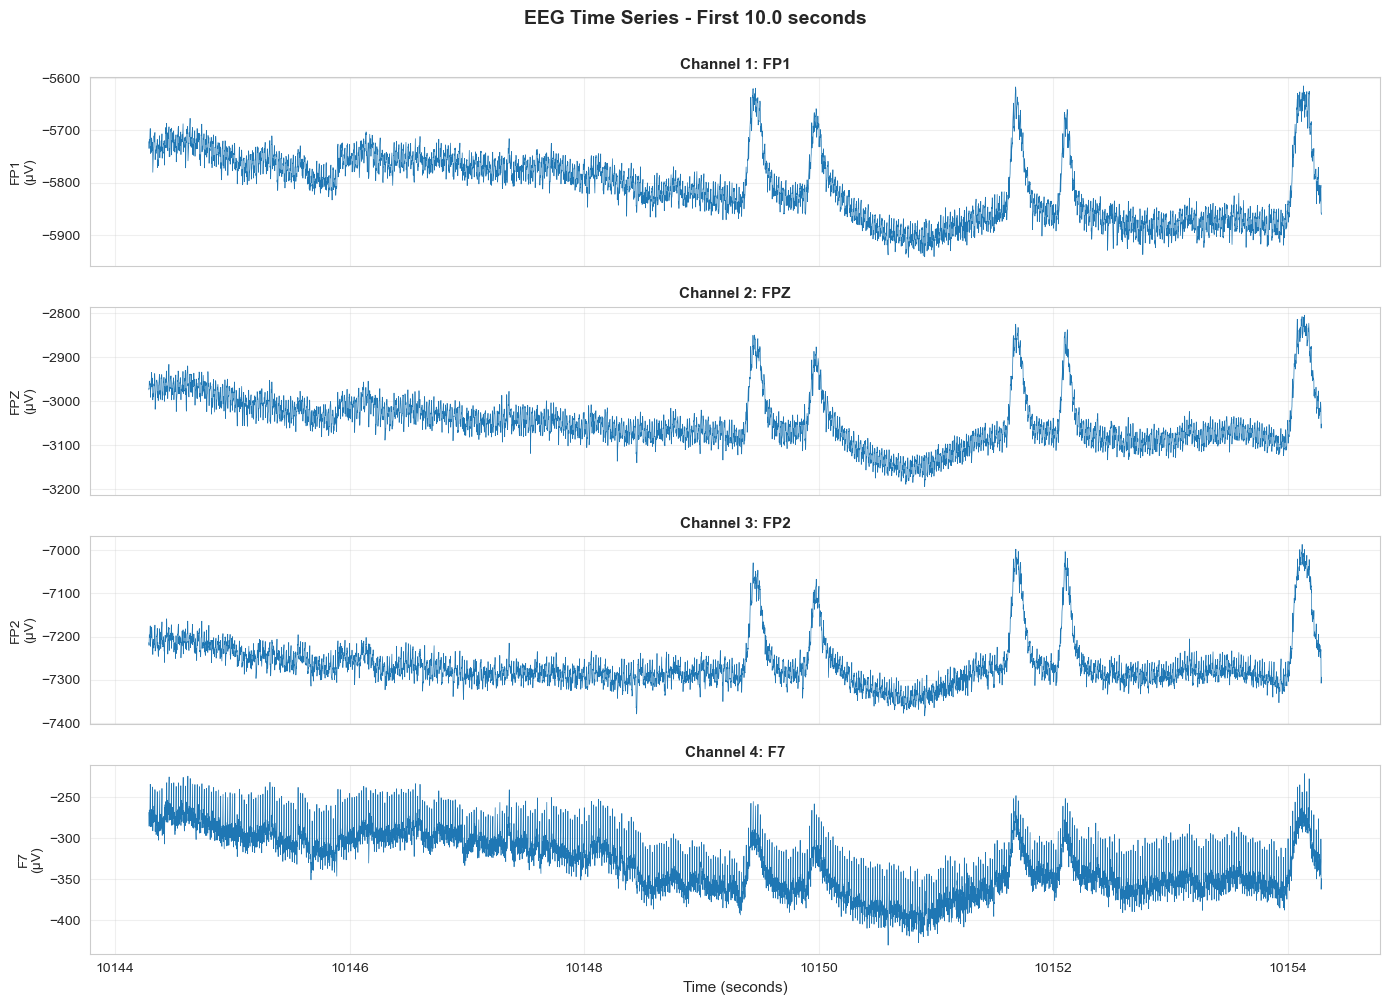

In [9]:
# Plot first 4 channels (or all if less than 4)
num_channels_to_plot = min(4, eeg_data.shape[1])
time_window = min(10, eeg_timestamps[-1] - eeg_timestamps[0])  # First 10 seconds

# Find indices for time window
mask = (eeg_timestamps >= eeg_timestamps[0]) & (eeg_timestamps <= eeg_timestamps[0] + time_window)

fig, axes = plt.subplots(num_channels_to_plot, 1, figsize=(14, 2.5*num_channels_to_plot), sharex=True)
if num_channels_to_plot == 1:
    axes = [axes]

for i in range(num_channels_to_plot):
    axes[i].plot(eeg_timestamps[mask], eeg_data[mask, i], linewidth=0.5)
    axes[i].set_ylabel(f'{channel_labels[i]}\n(µV)', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_title(f'Channel {i+1}: {channel_labels[i]}', fontsize=11, fontweight='bold')

axes[-1].set_xlabel('Time (seconds)', fontsize=11)
plt.suptitle(f'EEG Time Series - First {time_window:.1f} seconds', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 5.2 Distribution of Signal Amplitudes

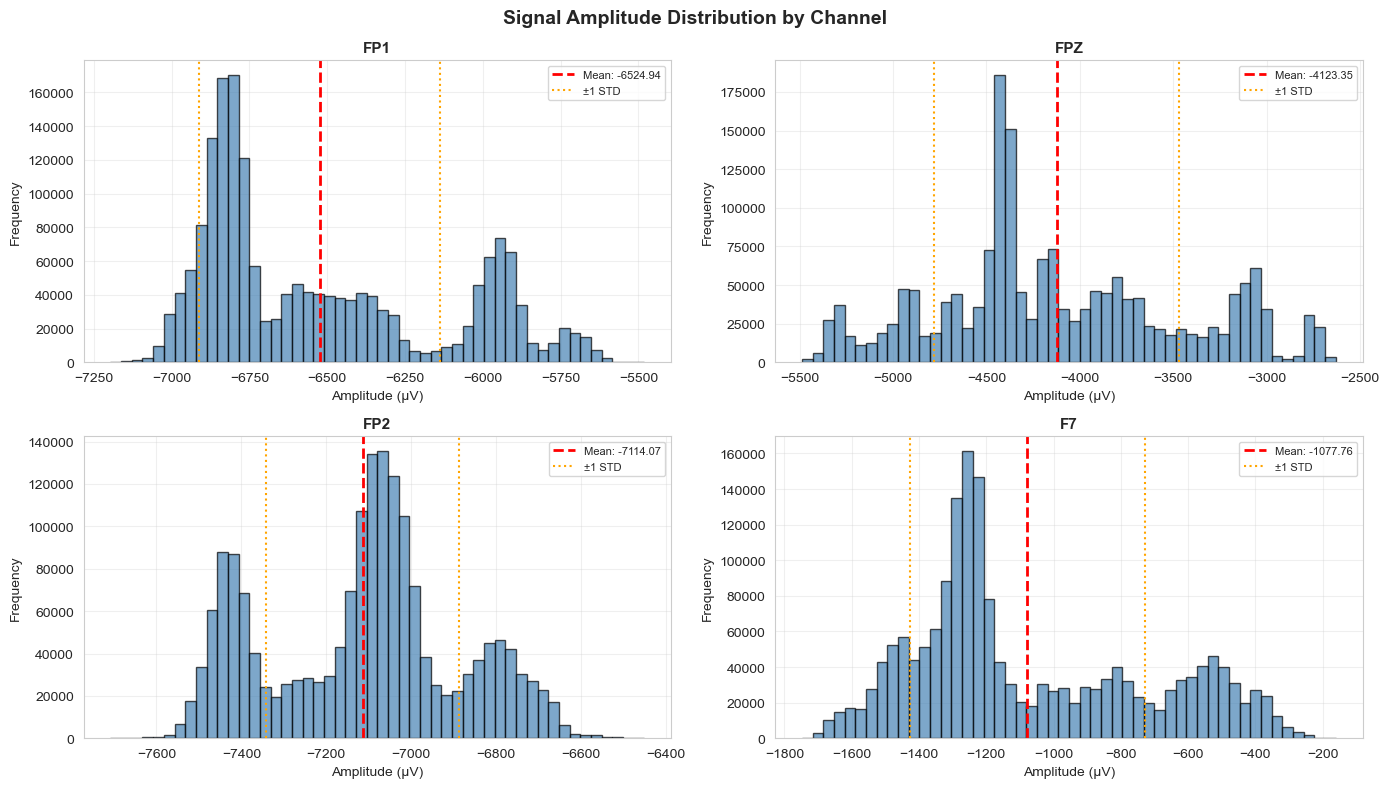

In [10]:
# Plot histograms for first 4 channels
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i in range(min(4, eeg_data.shape[1])):
    axes[i].hist(eeg_data[:, i], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[i].set_xlabel('Amplitude (µV)', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].set_title(f'{channel_labels[i]}', fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    
    # Add mean and std lines
    mean_val = np.mean(eeg_data[:, i])
    std_val = np.std(eeg_data[:, i])
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(mean_val + std_val, color='orange', linestyle=':', linewidth=1.5, label=f'±1 STD')
    axes[i].axvline(mean_val - std_val, color='orange', linestyle=':', linewidth=1.5)
    axes[i].legend(fontsize=8)

plt.suptitle('Signal Amplitude Distribution by Channel', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 5.3 Boxplot - Overall Channel Comparison

/var/folders/3k/34138f_91jd76wfhnjxd3zx00000gn/T/ipykernel_31101/2388162933.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([df_plot[col].dropna() for col in channel_labels],


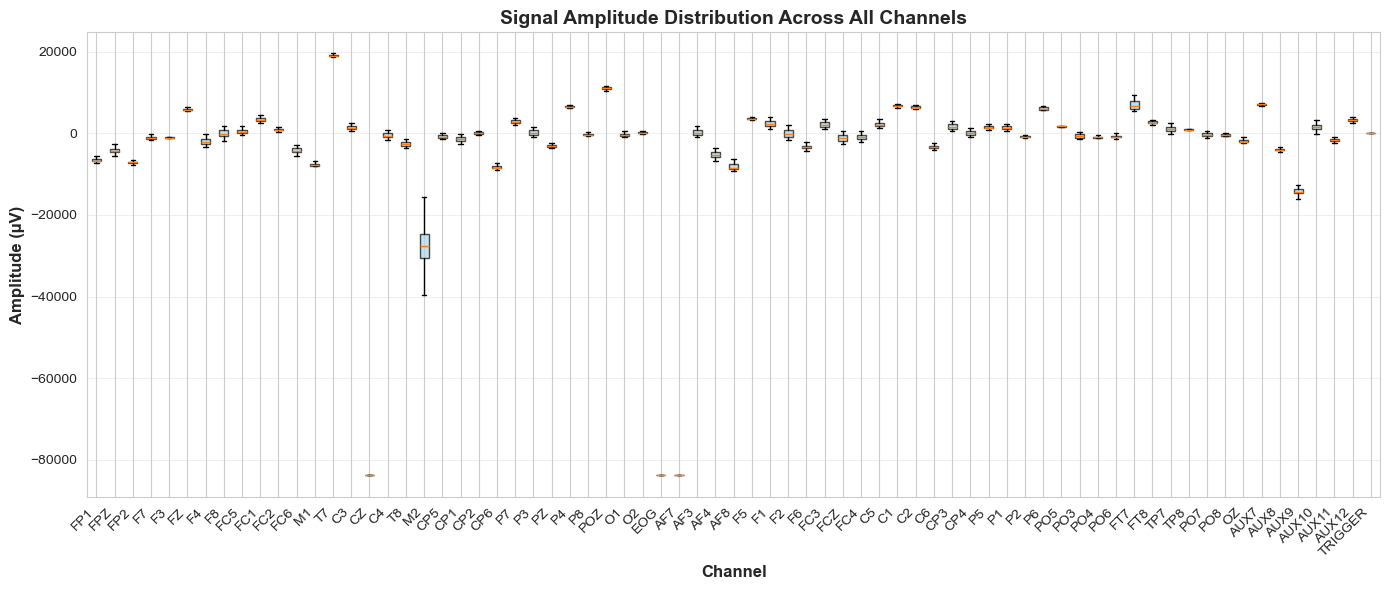

In [11]:
# Create boxplot for all channels
plt.figure(figsize=(14, 6))
df_plot = df[channel_labels].copy()

# Use sampling if too many data points
if len(df_plot) > 10000:
    df_plot = df_plot.sample(n=10000, random_state=42)

bp = plt.boxplot([df_plot[col].dropna() for col in channel_labels], 
                  labels=channel_labels,
                  patch_artist=True,
                  showfliers=False)

# Color the boxes
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

plt.xlabel('Channel', fontsize=12, fontweight='bold')
plt.ylabel('Amplitude (µV)', fontsize=12, fontweight='bold')
plt.title('Signal Amplitude Distribution Across All Channels', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 5.4 Correlation Heatmap Between Channels

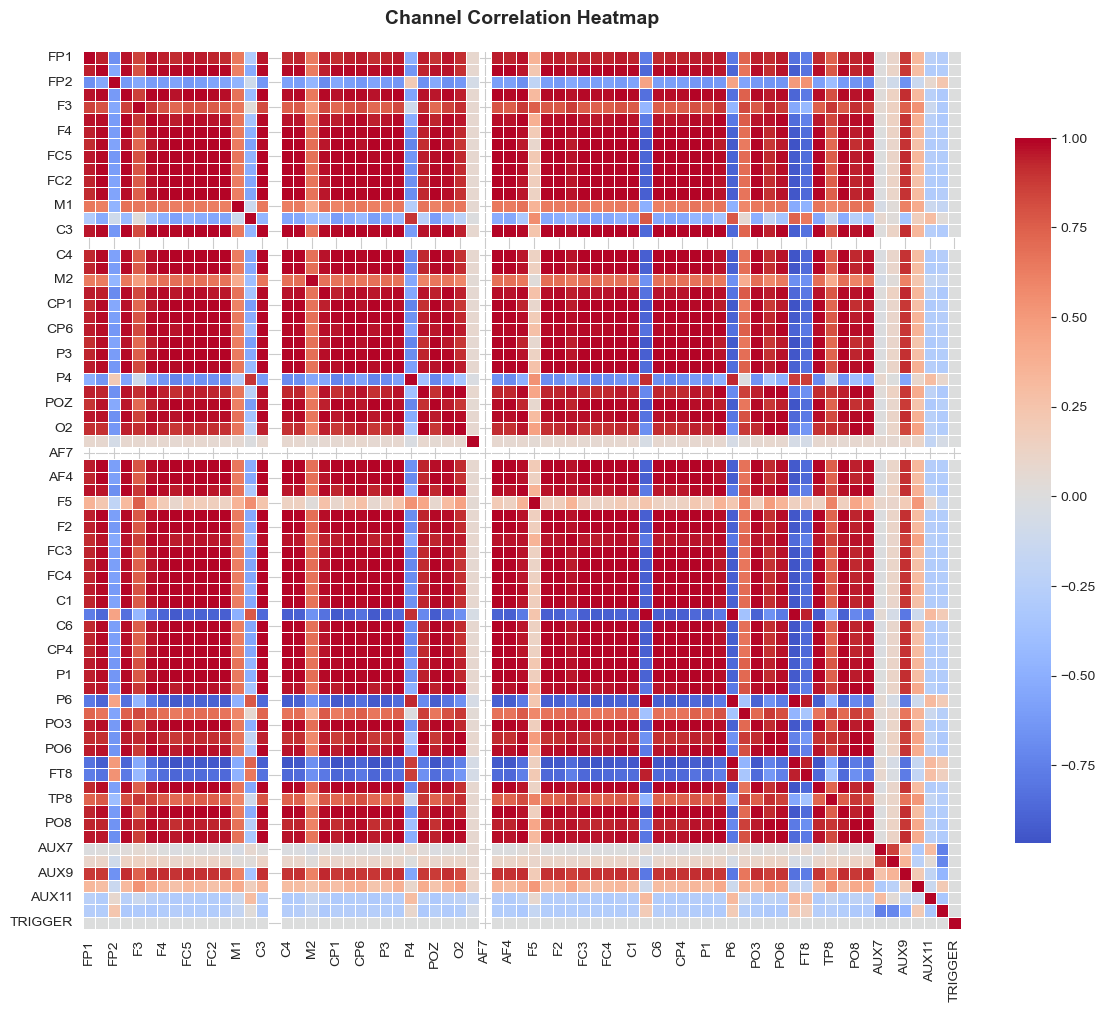


Correlation Insights:
Mean correlation (excluding diagonal): nan
Max correlation (excluding diagonal): nan
Min correlation (excluding diagonal): nan


In [12]:
# Compute correlation matrix
correlation_matrix = df[channel_labels].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=len(channel_labels) <= 10,  # Only annotate if 10 or fewer channels
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            fmt='.2f' if len(channel_labels) <= 10 else None)

plt.title('Channel Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print some correlation insights
print("\nCorrelation Insights:")
print(f"Mean correlation (excluding diagonal): {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].mean():.3f}")
print(f"Max correlation (excluding diagonal): {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].max():.3f}")
print(f"Min correlation (excluding diagonal): {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].min():.3f}")

### 5.5 Power Spectral Density (PSD)

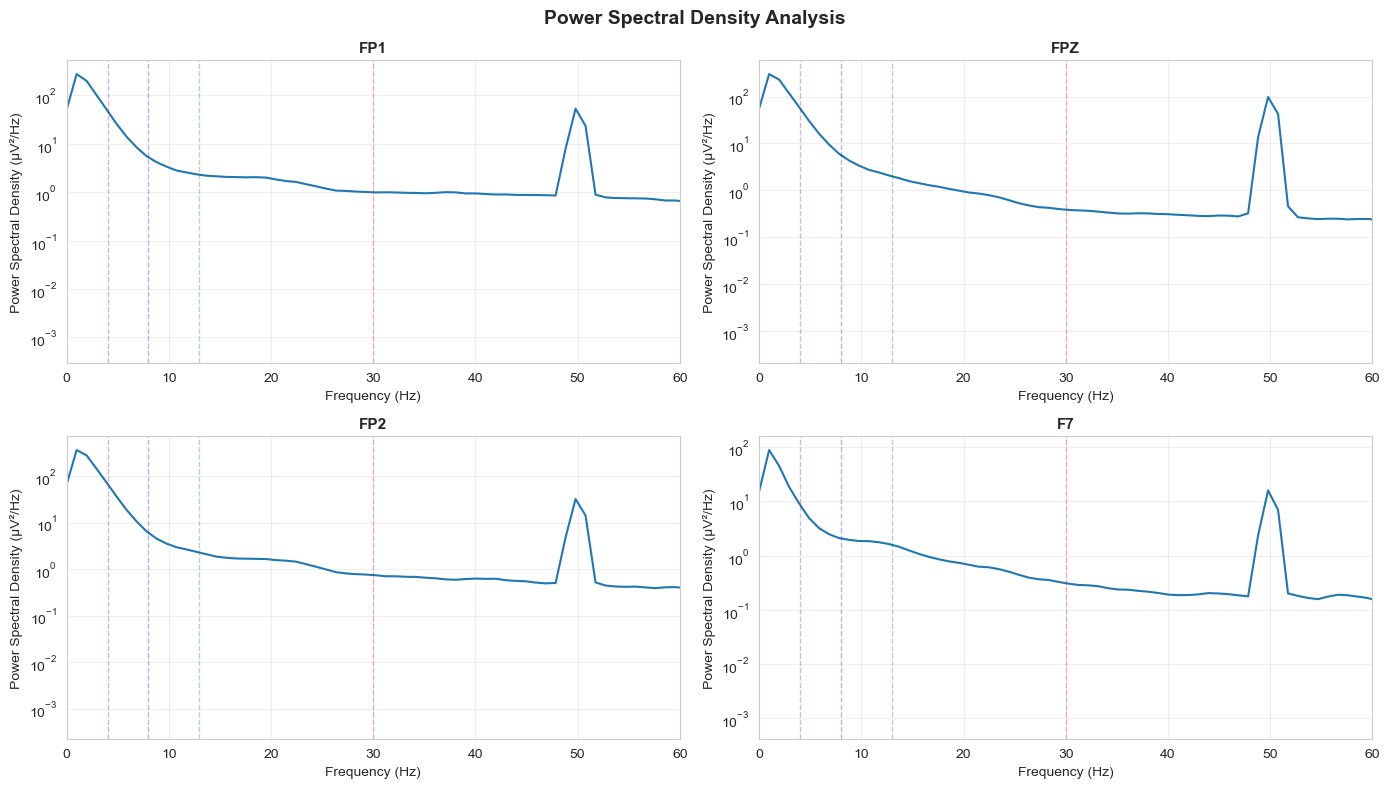


EEG Frequency Bands (approximate):
  Delta: 0.5-4 Hz
  Theta: 4-8 Hz
  Alpha: 8-13 Hz
  Beta: 13-30 Hz
  Gamma: >30 Hz


In [13]:
from scipy import signal

# Compute PSD for first 4 channels
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

for i in range(min(4, eeg_data.shape[1])):
    # Compute PSD using Welch's method
    freqs, psd = signal.welch(eeg_data[:, i], fs=sampling_rate, nperseg=min(1024, len(eeg_data[:, i])//4))
    
    axes[i].semilogy(freqs, psd, linewidth=1.5)
    axes[i].set_xlabel('Frequency (Hz)', fontsize=10)
    axes[i].set_ylabel('Power Spectral Density (µV²/Hz)', fontsize=10)
    axes[i].set_title(f'{channel_labels[i]}', fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim([0, min(60, sampling_rate/2)])  # Show up to 60 Hz or Nyquist frequency
    
    # Mark common EEG bands
    axes[i].axvline(4, color='purple', alpha=0.3, linestyle='--', linewidth=1)  # Theta
    axes[i].axvline(8, color='blue', alpha=0.3, linestyle='--', linewidth=1)    # Alpha
    axes[i].axvline(13, color='green', alpha=0.3, linestyle='--', linewidth=1)  # Beta
    axes[i].axvline(30, color='red', alpha=0.3, linestyle='--', linewidth=1)    # Gamma

plt.suptitle('Power Spectral Density Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nEEG Frequency Bands (approximate):")
print("  Delta: 0.5-4 Hz")
print("  Theta: 4-8 Hz")
print("  Alpha: 8-13 Hz")
print("  Beta: 13-30 Hz")
print("  Gamma: >30 Hz")

## 6. Additional Stream Information

Let's check if there are any marker streams or other auxiliary data.

# EDA - EMG 

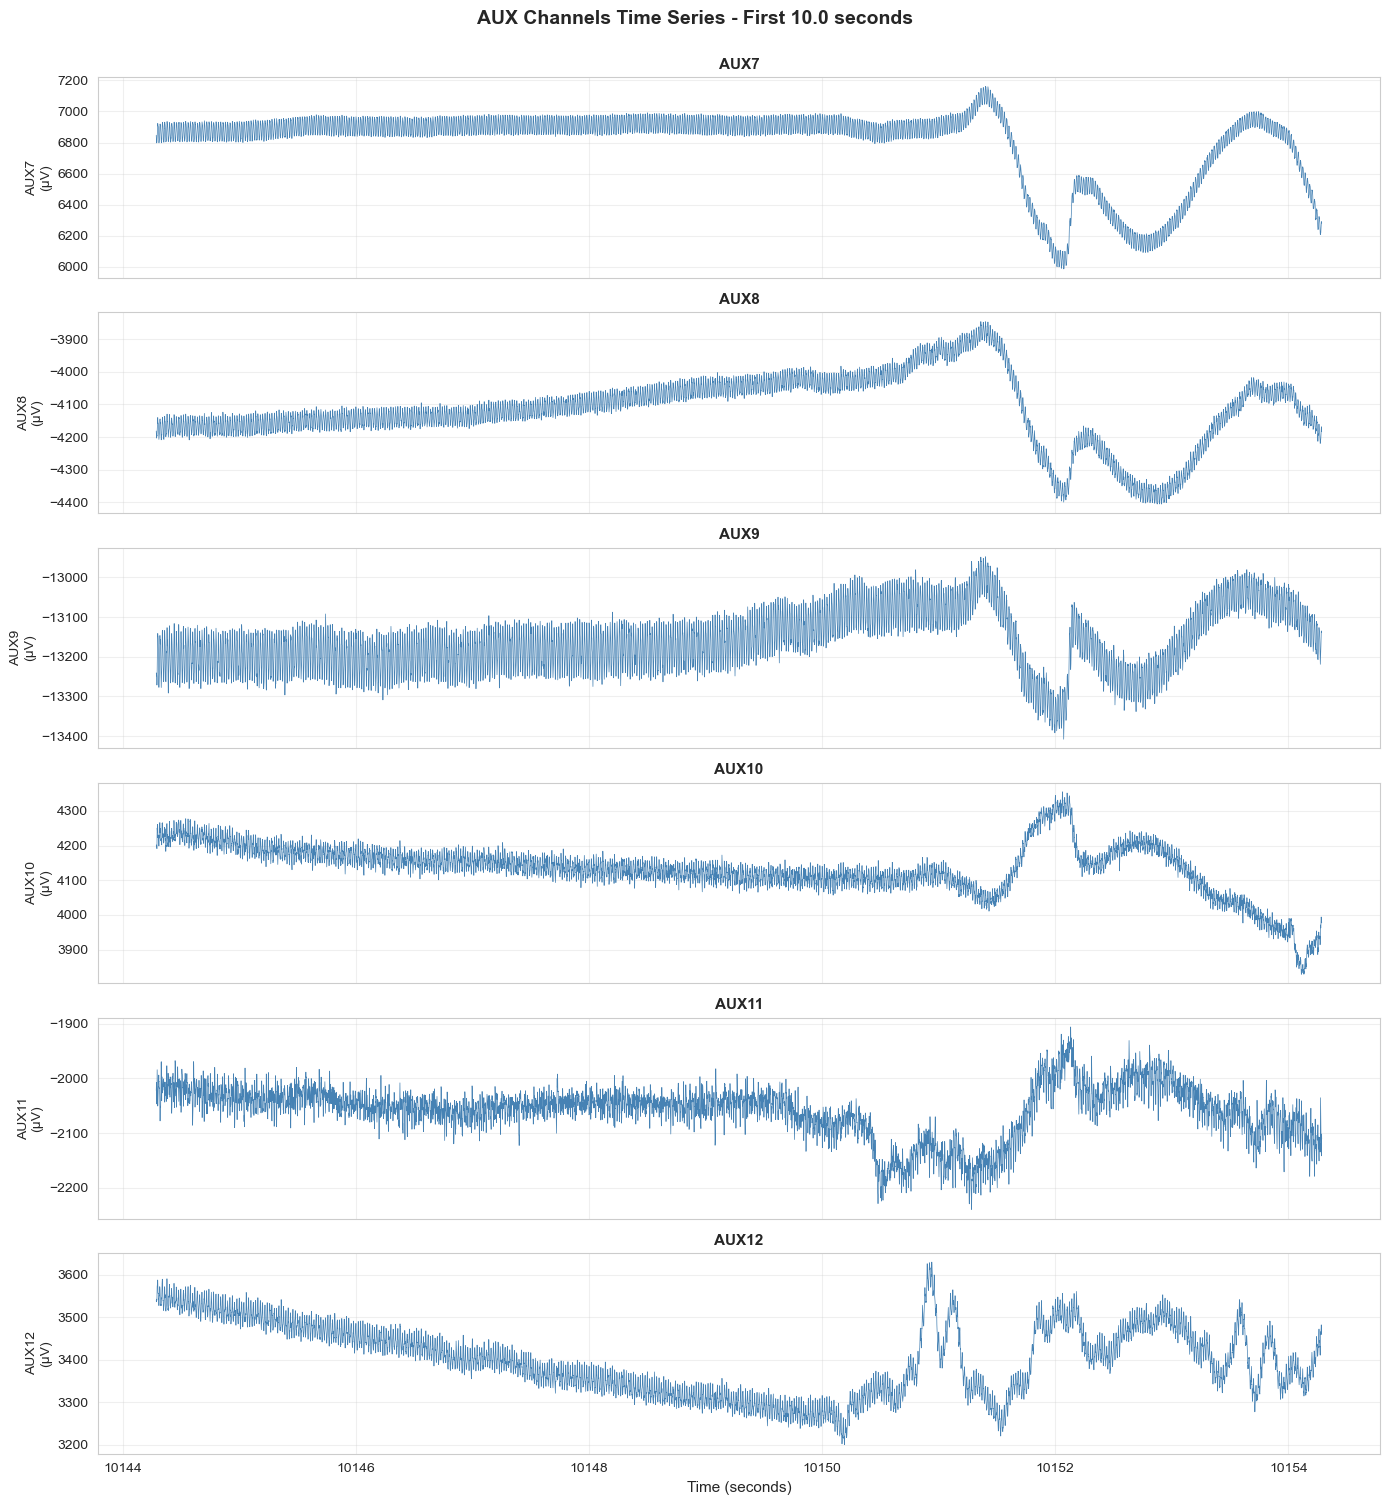

In [19]:
# Define the AUX channels to plot
aux_channels = ['AUX7', 'AUX8', 'AUX9', 'AUX10', 'AUX11', 'AUX12']

# Find indices of these channels in channel_labels
aux_indices = []
for ch_name in aux_channels:
    if ch_name in channel_labels:
        aux_indices.append(channel_labels.index(ch_name))
    else:
        print(f"Warning: Channel {ch_name} not found in data")

if not aux_indices:
    print(f"Error: None of the specified AUX channels found.")
    print(f"Available channels: {channel_labels}")
else:
    # Plot the AUX channels
    num_channels_to_plot = len(aux_indices)
    time_window = min(10, eeg_timestamps[-1] - eeg_timestamps[0])  # First 10 seconds
    
    # Find indices for time window
    mask = (eeg_timestamps >= eeg_timestamps[0]) & (eeg_timestamps <= eeg_timestamps[0] + time_window)
    
    fig, axes = plt.subplots(num_channels_to_plot, 1, figsize=(14, 2.5*num_channels_to_plot), sharex=True)
    if num_channels_to_plot == 1:
        axes = [axes]
    
    for idx, ch_idx in enumerate(aux_indices):
        axes[idx].plot(eeg_timestamps[mask], eeg_data[mask, ch_idx], linewidth=0.5, color='steelblue')
        axes[idx].set_ylabel(f'{channel_labels[ch_idx]}\n(µV)', fontsize=10)
        axes[idx].grid(True, alpha=0.3)
        axes[idx].set_title(f'{channel_labels[ch_idx]}', fontsize=11, fontweight='bold')
    
    axes[-1].set_xlabel('Time (seconds)', fontsize=11)
    plt.suptitle(f'AUX Channels Time Series - First {time_window:.1f} seconds', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()


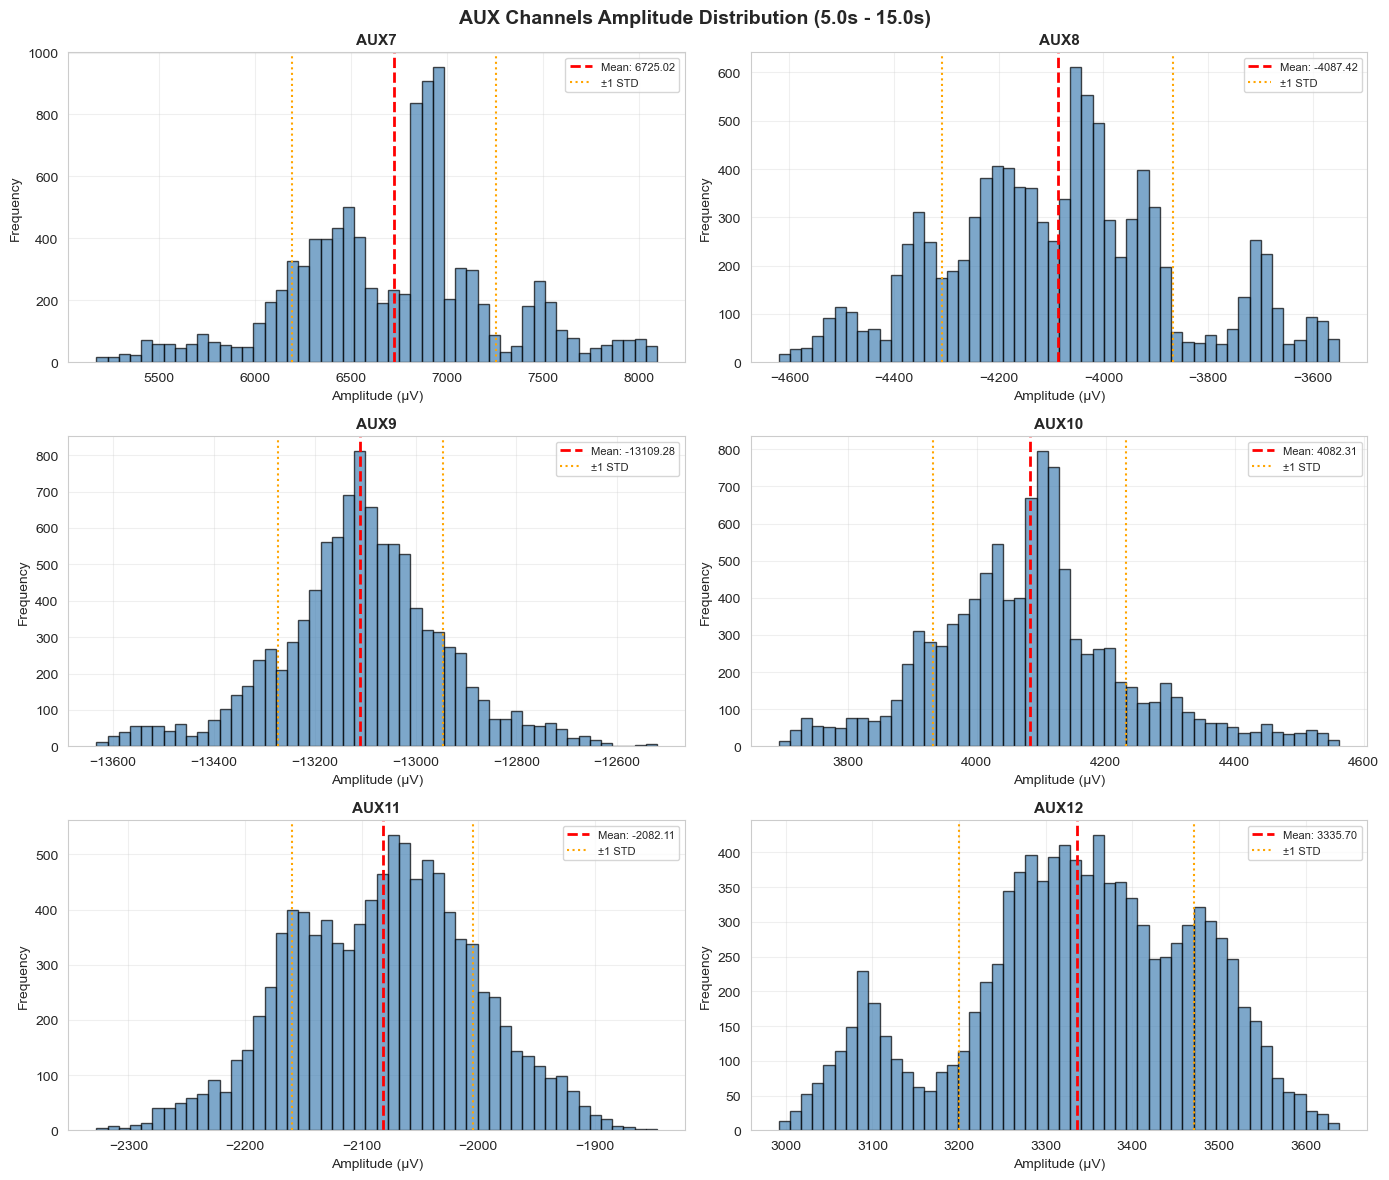

<Figure size 1200x600 with 0 Axes>

In [21]:
# Plot histograms for AUX channels using the same time window
# Create mask for the specified time window
recording_start = eeg_timestamps[0]
mask = (eeg_timestamps >= recording_start + start_time) & (eeg_timestamps <= recording_start + end_time)

# Create subplots for AUX channels (3 rows x 2 columns for 6 channels)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, ch_idx in enumerate(aux_indices):
    # Get data for this channel within the time window
    channel_data = eeg_data[mask, ch_idx]
    
    axes[idx].hist(channel_data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx].set_xlabel('Amplitude (µV)', fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'{channel_labels[ch_idx]}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Add mean and std lines
    mean_val = np.mean(channel_data)
    std_val = np.std(channel_data)
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(mean_val + std_val, color='orange', linestyle=':', linewidth=1.5, label=f'±1 STD')
    axes[idx].axvline(mean_val - std_val, color='orange', linestyle=':', linewidth=1.5)
    axes[idx].legend(fontsize=8)

plt.suptitle(f'AUX Channels Amplitude Distribution ({start_time}s - {end_time}s)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


for idx, ch_idx in enumerate(aux_indices):
    axes[idx].plot(eeg_timestamps[mask], eeg_data[mask, ch_idx], linewidth=0.5, color='steelblue')
    axes[idx].set_ylabel(f'{channel_labels[ch_idx]}\n(µV)', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_title(f'{channel_labels[ch_idx]}', fontsize=11, fontweight='bold')

axes[-1].set_xlabel('Time (seconds)', fontsize=11)
plt.suptitle(f'AUX Channels Time Series ({start_time}s - {end_time}s)', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()
    

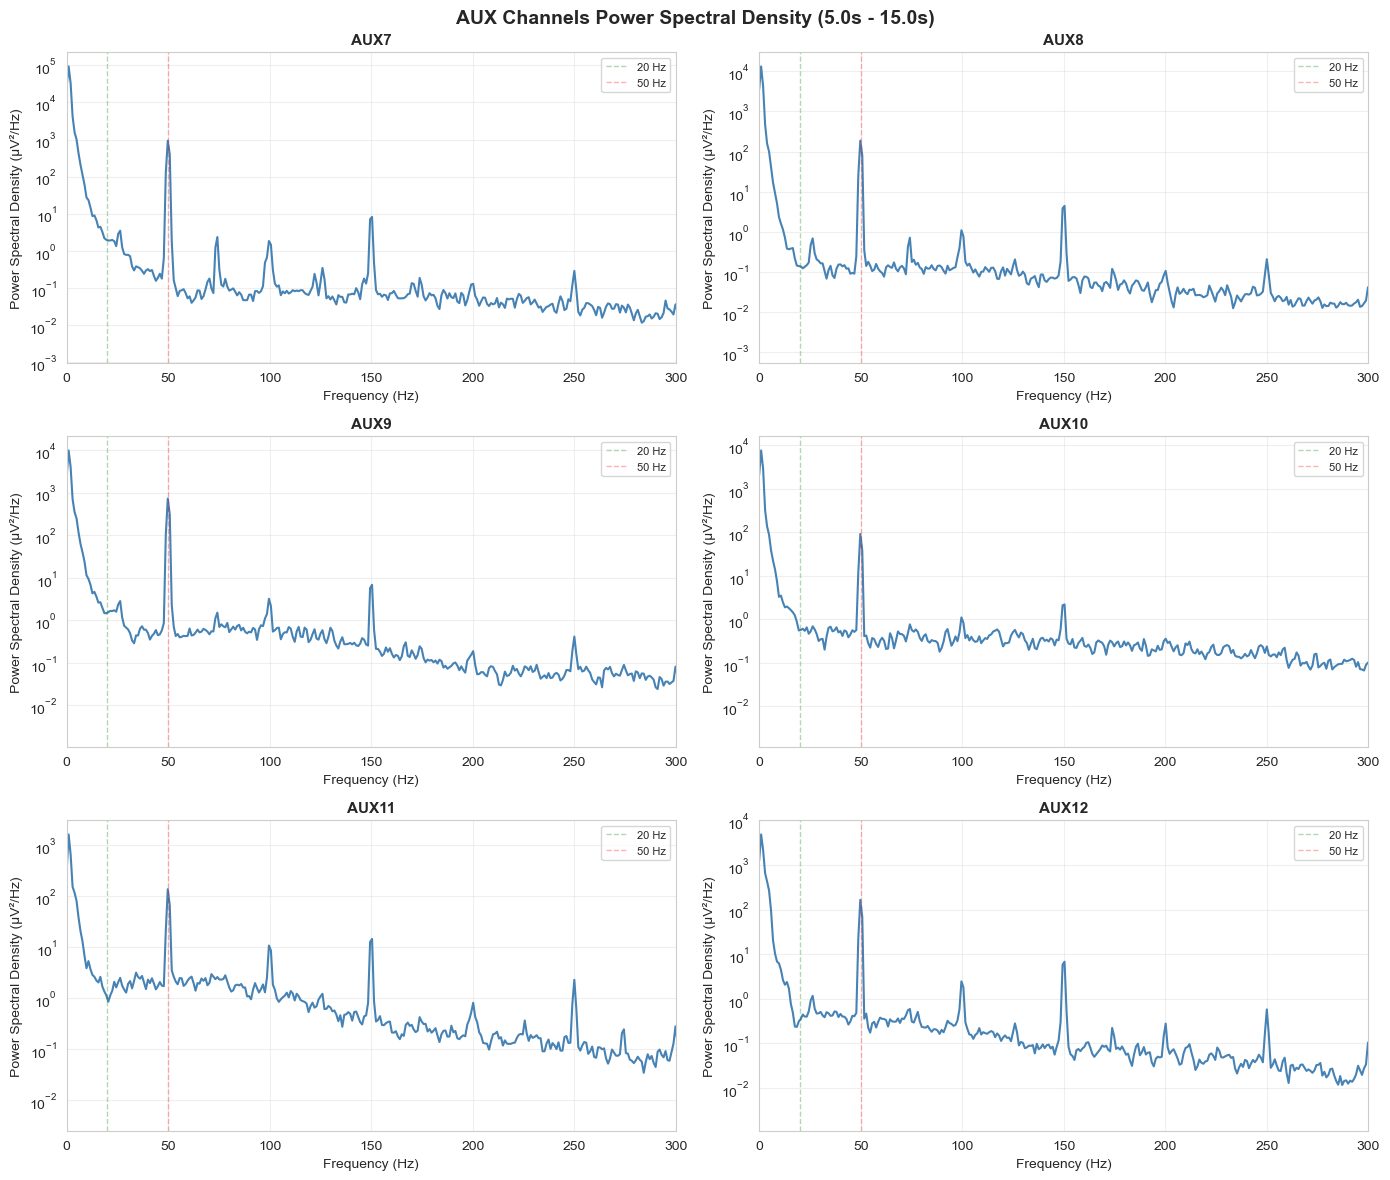


PSD analysis completed for 6 AUX channels
Time window: 5.0s to 15.0s (10.0s duration)
Frequency range: 0 to 60.0 Hz
Samples analyzed per channel: 10,000


In [24]:
from scipy import signal

# Compute PSD for AUX channels using the same time window
# Create mask for the specified time window
recording_start = eeg_timestamps[0]
mask = (eeg_timestamps >= recording_start + start_time) & (eeg_timestamps <= recording_start + end_time)

# Create subplots for AUX channels (3 rows x 2 columns for 6 channels)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, ch_idx in enumerate(aux_indices):
    # Get data for this channel within the time window
    channel_data = eeg_data[mask, ch_idx]
    
    # Compute PSD using Welch's method
    freqs, psd = signal.welch(channel_data, fs=sampling_rate, nperseg=min(1024, len(channel_data)//4))
    
    axes[idx].semilogy(freqs, psd, linewidth=1.5, color='steelblue')
    axes[idx].set_xlabel('Frequency (Hz)', fontsize=10)
    axes[idx].set_ylabel('Power Spectral Density (µV²/Hz)', fontsize=10)
    axes[idx].set_title(f'{channel_labels[ch_idx]}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim([0, 300])  # Show up to 60 Hz or Nyquist frequency
    
    # Mark common frequency bands (useful for EMG analysis)
    axes[idx].axvline(20, color='green', alpha=0.3, linestyle='--', linewidth=1, label='20 Hz')
    axes[idx].axvline(50, color='red', alpha=0.3, linestyle='--', linewidth=1, label='50 Hz')
    axes[idx].legend(fontsize=8, loc='upper right')

plt.suptitle(f'AUX Channels Power Spectral Density ({start_time}s - {end_time}s)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nPSD analysis completed for {len(aux_indices)} AUX channels")
print(f"Time window: {start_time}s to {end_time}s ({end_time - start_time}s duration)")
print(f"Frequency range: 0 to {min(60, sampling_rate/2):.1f} Hz")
print(f"Samples analyzed per channel: {mask.sum():,}")

# Load Preproc Data

In [22]:
df_windowed = pd.read_pickle("../data/preprocessed_aux_windows.pkl")
print(f"Shape: {df_windowed.shape}")
print(f"Columns: {df_windowed.columns.tolist()}")
print(f"\nFirst window AUX7 signal shape: {df_windowed.loc[0, 'AUX7'].shape}")
df_windowed.head()

Shape: (17939, 6)
Columns: ['AUX7', 'AUX8', 'AUX9', 'AUX10', 'AUX11', 'AUX12']

First window AUX7 signal shape: (200,)


,AUX7,AUX8,AUX9,AUX10,AUX11,AUX12
0,"[1.6005091332761523, -13.071606316270023, -24....","[0.5286972533583263, -3.6902798831241186, -10....","[1.4968837750068398, 8.987381880552716, 7.9730...","[0.49353446094652764, 0.43358812433150773, -3....","[-1.426801556864497, 8.042726421280344, 9.2012...","[-0.5602462991533963, -2.7414323803989338, -3...."
1,"[1.4363607482345597, -16.39130483103747, -28.5...","[0.5468503811214234, -4.1421158278435355, -9.0...","[0.9098678975022406, -21.425446206667228, -47....","[0.47025267186442765, 6.907094940327696, 10.58...","[-0.8673520398105039, 15.569421997146721, 23.9...","[-0.2198340039528194, -1.4775657676959562, -4...."
2,"[1.553643055712624, -15.012194913215268, -27.5...","[0.6757961410179807, -8.436800075938091, -12.6...","[1.597215606114529, -18.131242773511897, -30.1...","[0.6149616948650471, -5.503669699157121, -17.3...","[-0.3881499249653549, -0.2519755815494031, -7....","[0.5620063369355233, -0.8860552787191116, -6.5..."
3,"[1.9804753188942352, -9.526840614991889, -20.1...","[1.1619286062150587, -3.4885149936753628, -9.9...","[1.4125969081977037, -12.891403166046773, -25....","[1.476215716144376, -9.677409428631533, -4.748...","[1.016512626583148, 1.1247225417289297, 7.1813...","[0.9405728452913061, -2.9098494348042943, -2.9..."
4,"[2.3596982051827102, -7.784796931665618, -18.5...","[0.915680112947617, -3.336529469764088, -7.888...","[2.068051394881592, -10.496021599810023, -24.0...","[-0.19826496637445346, -2.0898266161261665, 0....","[-1.9642658412721952, 15.771066210665548, 37.2...","[-0.09103352465708421, -1.7749803011628669, -0..."


In [24]:
df_features = pd.read_pickle("../data/features_aux_windows.pkl")
print(f"Shape: {df_features.shape}")
print(f"Columns: {df_features.columns.tolist()}")

df_features.head()

Shape: (17939, 126)
Columns: ['AUX7_MAV', 'AUX7_VAR', 'AUX7_RMS', 'AUX7_SSC', 'AUX7_ZC', 'AUX7_WL', 'AUX7_AR1', 'AUX7_AR2', 'AUX7_AR3', 'AUX7_AR4', 'AUX7_AR5', 'AUX7_CC1', 'AUX7_CC2', 'AUX7_CC3', 'AUX7_CC4', 'AUX7_CC5', 'AUX7_MNF', 'AUX7_MDF', 'AUX7_WTWL', 'AUX7_WTVAR', 'AUX7_WTMAV', 'AUX8_MAV', 'AUX8_VAR', 'AUX8_RMS', 'AUX8_SSC', 'AUX8_ZC', 'AUX8_WL', 'AUX8_AR1', 'AUX8_AR2', 'AUX8_AR3', 'AUX8_AR4', 'AUX8_AR5', 'AUX8_CC1', 'AUX8_CC2', 'AUX8_CC3', 'AUX8_CC4', 'AUX8_CC5', 'AUX8_MNF', 'AUX8_MDF', 'AUX8_WTWL', 'AUX8_WTVAR', 'AUX8_WTMAV', 'AUX9_MAV', 'AUX9_VAR', 'AUX9_RMS', 'AUX9_SSC', 'AUX9_ZC', 'AUX9_WL', 'AUX9_AR1', 'AUX9_AR2', 'AUX9_AR3', 'AUX9_AR4', 'AUX9_AR5', 'AUX9_CC1', 'AUX9_CC2', 'AUX9_CC3', 'AUX9_CC4', 'AUX9_CC5', 'AUX9_MNF', 'AUX9_MDF', 'AUX9_WTWL', 'AUX9_WTVAR', 'AUX9_WTMAV', 'AUX10_MAV', 'AUX10_VAR', 'AUX10_RMS', 'AUX10_SSC', 'AUX10_ZC', 'AUX10_WL', 'AUX10_AR1', 'AUX10_AR2', 'AUX10_AR3', 'AUX10_AR4', 'AUX10_AR5', 'AUX10_CC1', 'AUX10_CC2', 'AUX10_CC3', 'AUX10_CC4', 'AUX10_CC5',

,AUX7_MAV,AUX7_VAR,AUX7_RMS,AUX7_SSC,AUX7_ZC,AUX7_WL,AUX7_AR1,AUX7_AR2,AUX7_AR3,AUX7_AR4,...,AUX12_CC1,AUX12_CC2,AUX12_CC3,AUX12_CC4,AUX12_CC5,AUX12_MNF,AUX12_MDF,AUX12_WTWL,AUX12_WTVAR,AUX12_WTMAV
0,17.546913,376.670499,19.410127,51,21,1258.532364,-0.298291,-0.870053,0.113211,1.190868,...,275.532084,-34.380901,22.424221,3.007396,-5.266815,78.184015,50.0,365.932484,5.957642,1.867559
1,17.310178,365.553822,19.125601,54,21,1242.471356,-0.307992,-0.885316,0.118408,1.205246,...,271.591132,-37.443868,23.629953,3.682717,-11.420204,89.007281,50.0,404.497606,7.252547,2.094947
2,17.060552,359.846117,18.971056,54,20,1248.571430,-0.253861,-0.858804,0.064524,1.158315,...,306.134838,-24.720573,18.270858,-7.345084,-5.294238,83.493181,50.0,360.641921,5.798709,1.884731
3,16.813337,349.997335,18.710928,50,21,1244.450249,-0.250696,-0.854921,0.062363,1.149932,...,307.075930,-13.006133,15.430451,-14.122888,1.139089,82.114654,50.0,312.725734,4.390774,1.651220
4,17.194994,357.659755,18.913826,50,20,1259.060135,-0.346740,-0.901314,0.158049,1.237882,...,285.914659,-29.496498,19.911817,-6.139038,-2.554048,84.222844,50.0,336.780379,5.162545,1.778090
